In [1]:
#Plot2 - Lines exhibite divese yield responses to warming

In [1]:
import matplotlib.pyplot as plt
import glob
import math
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
#from mpl_toolkits.axes_grid1.colorbar import colorbar
from sklearn.linear_model import HuberRegressor
from mycolorpy import colorlist as mcp
import os
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
fig_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\0_Adaptation\\6_Plots\\"
nursery=["ESWYT","IDYN","IWWYT_IRR","HTWYT","SAWYT","IWWYT_SA"]
colors=mcp.gen_color('Paired',n=6)
siten=[564,375,71,240,356,44,0]
gcm=['gf','ip','mk','mp','mr']
ssp=['126','370','585']
model = HuberRegressor()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5080\372385204.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(2,2,1)


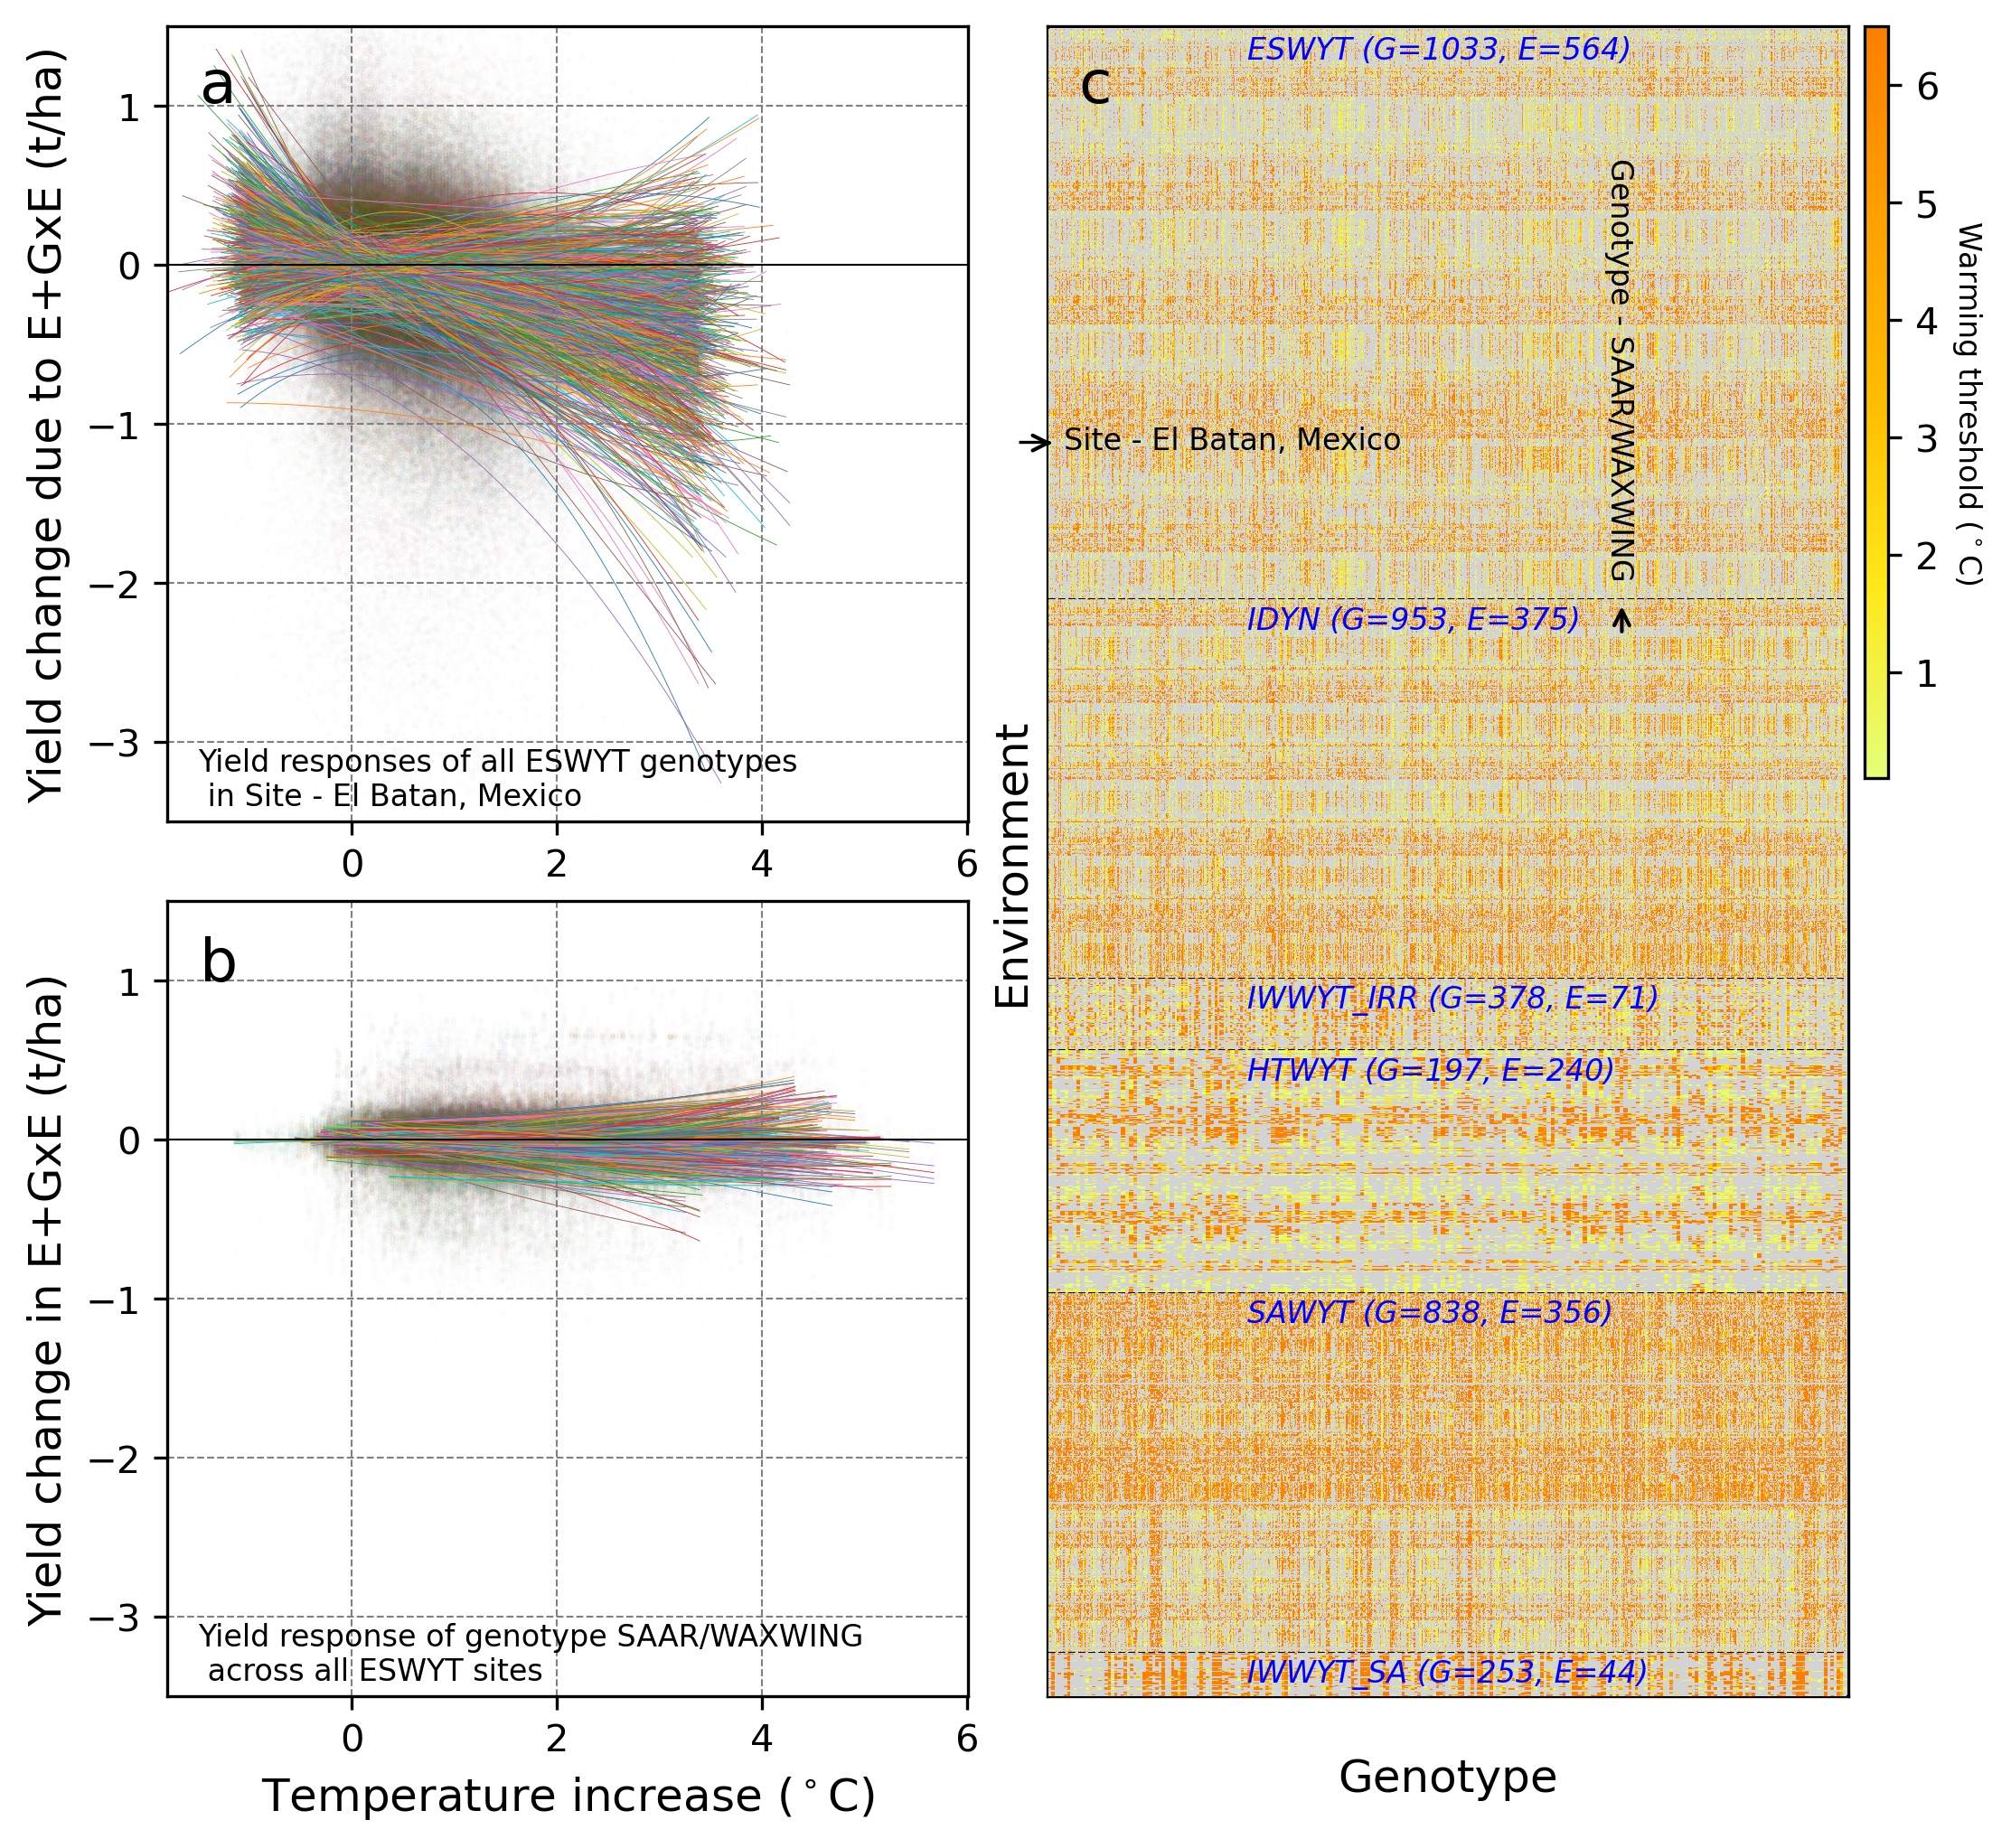

In [3]:
sns.set_style(rc = {'axes.facecolor': 'white'})
fig, ax= plt.subplots(figsize=(8, 8),dpi=300)
data_dir="E:\\Works\\IWIN\\forecastYield\\"
######################All lines in one site###########################
ax=plt.subplot(2,2,1)
n=0
site='42221'#'51204'
line=glob.glob(data_dir+nursery[n]+'\\'+site+'\\yld_*.csv')
for l in line:
#Yield file - yield change
    if os.path.exists(l):
        yld=pd.read_csv(l)
        #weather file only keeps the mean temperature and pivot to as yield format
        wea=pd.read_csv(l.replace('yld','wea'))
        wea['t']=wea[['tavg_veg','tavg_rep','tavg_gfi']].mean(axis=1)
        wea=wea.pivot_table(index='sce',columns='year',values='t',aggfunc='mean').reset_index()
        #create a new dataframe to save the data
        df=pd.DataFrame(columns=['sce','ssp','ya','yld_ch','t_ch'])
        for g in gcm:
            #historical yield
            his=yld[yld['sce']==g+'_h']#.iloc[0,1:].tolist()[:30]
            #historical temperature
            his_t=wea[wea['sce']==g+'_h']
            for s in ssp:
                fut=yld[yld['sce']==g+'_'+s[0]]#.iloc[0,1:].tolist()              
                fut_t=wea[wea['sce']==g+'_'+s[0]]
                if (fut.shape[0]>0) & (his.shape[0]>0):
                    fut_v=fut.iloc[0,1:].tolist()
                    fut_t_v=fut_t.iloc[0,1:].tolist()
                    his_v=his.iloc[0,1:].tolist()[:30]
                    his_v=np.mean([0 if math.isnan(x) else x for x in his_v])
                    his_t_v=his_t.iloc[0,1:].tolist()[:30]
                    his_t_v=np.mean([0 if math.isnan(x) else x for x in his_t_v])
                    temp=pd.DataFrame(columns=['sce','ssp','ya','yld_ch'])
                    temp['yld_ch']=fut_v-his_v
                    temp['t_ch']=fut_t_v-his_t_v
                    temp['sce']=g
                    temp['ssp']=s[0]
                    temp['ya']=range(2015,2015+temp.shape[0])
                    df=pd.concat([df,temp],axis=0)
        #start the regression
        df=df.dropna()
        #df=df[(df.t_ch>=df.t_ch.quantile(0.05))&(df.t_ch<=df.t_ch.quantile(0.95))] #Remove outliers
        if df.shape[0]>10: #make sure there are more than 10 lines
            ax.scatter(df.t_ch,df.yld_ch,s=0.1,alpha=0.01)
            #robust regression
            df['t_ch2']=df['t_ch']**2
            X=df[['t_ch2','t_ch']]
            y=df['yld_ch']
            model.fit(X.values,y.values)
            X1=pd.DataFrame()
            X1['t_ch']=np.linspace(df.t_ch.min(),df.t_ch.max(),50)
            X1.insert(0,'t_ch2',X1['t_ch']**2,True)
            X1['pred']=list(model.predict(X1.values))
            intercept=model.predict(np.array([0,0]).reshape(1, -1))
            ax.plot(X1.t_ch,X1.pred,'-',linewidth=0.2)
ax.set_ylim([-3.5,1.5]) 
ax.set_xlim([-1.8,6.01]) 
ax.set_ylabel("Yield change due to E+GxE (t/ha)",fontsize=12)
#ax.set_xlabel("Temperature increase ($^\circ$C)",fontsize=12)
ax.text(-1.5,-3.4,"Yield responses of all ESWYT genotypes\n in Site - El Batan, Mexico",fontsize=8)
ax.axhline(y=0, color='k', linestyle='-',linewidth=0.5)
for a in [0,2,4]: ax.axvline(x=a, color='grey', linestyle='--',linewidth=0.5)
for a in [-3,-2,-1,1]: ax.axhline(y=a, color='grey', linestyle='--',linewidth=0.5)

##############################One line in all sites##################################################
ax = plt.subplot(2,2,3)
sitelist=os.listdir(data_dir+nursery[n]+'\\')
l=737
for sit in sitelist:
#Yield file - yield change
    if os.path.exists(line[l].replace(site,sit)):
        yld=pd.read_csv(line[l].replace(site,sit))
         #weather file only keeps the mean temperature and pivot to as yield format
        wea=pd.read_csv(line[l].replace(site,sit).replace('yld','wea'))
        wea['t']=wea[['tavg_veg','tavg_rep','tavg_gfi']].mean(axis=1)
        wea=wea.pivot_table(index='sce',columns='year',values='t',aggfunc='mean').reset_index()
        if yld.shape[0]<30:
            df=pd.DataFrame(columns=['sce','ssp','ya','yld_ch','t_ch'])
            for g in gcm:
                #historical yield
                his=yld[yld['sce']==g+'_h']#.iloc[0,1:].tolist()[:30]
                #historical temperature
                his_t=wea[wea['sce']==g+'_h']
                for s in ssp:
                    fut=yld[yld['sce']==g+'_'+s[0]]#.iloc[0,1:].tolist()              
                    fut_t=wea[wea['sce']==g+'_'+s[0]]
                    if (fut.shape[0]>0) & (his.shape[0]>0):
                        fut_v=fut.iloc[0,1:].tolist()
                        fut_t_v=fut_t.iloc[0,1:].tolist()
                        his_v=his.iloc[0,1:].tolist()[:30]
                        his_v=np.mean([0 if math.isnan(x) else x for x in his_v])
                        his_t_v=his_t.iloc[0,1:].tolist()[:30]
                        his_t_v=np.mean([0 if math.isnan(x) else x for x in his_t_v])
                        temp=pd.DataFrame(columns=['sce','ssp','ya','yld_ch'])
                        temp['yld_ch']=fut_v-his_v
                        temp['t_ch']=fut_t_v-his_t_v
                        temp['sce']=g
                        temp['ssp']=s[0]
                        temp['ya']=range(2015,2015+temp.shape[0])
                        df=pd.concat([df,temp],axis=0)
            df=df.dropna()
            df=df[(df.t_ch>=df.t_ch.quantile(0.05))&(df.t_ch<=df.t_ch.quantile(0.95))]
            if df.shape[0]>10:
                #plt.scatter(df.t_ch,df.yld_ch)
                ax.scatter(df.t_ch,df.yld_ch,s=0.1,alpha=0.01)
                #Use robust regression - Huber regression - deweight the outliers 
                df['t_ch2']=df['t_ch']**2
                X=df[['t_ch2','t_ch']]
                y=df['yld_ch']
                model.fit(X.values,y.values)
                X1=pd.DataFrame()
                X1['t_ch']=np.linspace(df.t_ch.min(),df.t_ch.max(),50)
                X1.insert(0,'t_ch2',X1['t_ch']**2,True)
                X1['pred']=list(model.predict(X1.values))
                intercept=model.predict(np.array([0,0]).reshape(1, -1))
                ax.plot(X1.t_ch,X1.pred,'-',linewidth=0.2)
ax.set_ylim([-3.5,1.5])
ax.set_xlim([-1.8,6.01])  
ax.set_ylabel("Yield change in E+GxE (t/ha)",fontsize=12)
ax.set_xlabel("Temperature increase ($^\circ$C)",fontsize=12)
ax.text(-1.5,-3.4,"Yield response of genotype SAAR/WAXWING\n across all ESWYT sites",fontsize=8)
ax.axhline(y=0, color='k', linestyle='-',linewidth=0.5)
for a in [0,2,4]: ax.axvline(x=a, color='grey', linestyle='--',linewidth=0.5)
for a in [-3,-2,-1,1]: ax.axhline(y=a, color='grey', linestyle='--',linewidth=0.5)
    
#####################Warming adaptation across genotypes and environments############################
data_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\0_Adaptation\\3_Results\\AdaptedLinesAndSites\\"
ax = plt.subplot(1,2,2)
ax.set_xticks([])
ax.set_yticks([])
#ax3.set_axis_off()
ax.set_ylabel('Environment',fontsize=12)
ax.set_xlabel('Genotype',labelpad=16,fontsize=12)
sns.set_style(rc = {'axes.facecolor': 'lightgrey'})
for n in range(6):
    ax_1 = fig.add_axes([0.531, 0.879-0.769*(sum(siten[:(n+1)])/sum(siten)), 0.368,0.769*(siten[n]/sum(siten))])#
    if n>0: ax_1.axhline(y=0,xmin=0,xmax=1,c='black',ls='--',linewidth=0.5)
    df=pd.read_csv(data_dir+nursery[n]+"_woco2_Threshold.csv")
    df.replace(0, np.nan, inplace=True)
    df=np.array(df.iloc[:,1:]).T
    df[df>6]=6.5
    #plt.imshow(df, cmap='gray', vmin=0, vmax=255)
    if n==0:
        im=sns.heatmap(df, linewidth=0,cmap='Wistia',ax=ax_1,cbar=False) #,cbar_kws = dict(use_gridspec=False,location="top")
        ax_1.set_yticks([409])
        ax_1.tick_params('both', length=8)
        ax_1.set_xticks([737])
        ax_1.annotate("", xy=(5, 410), xytext=(0, 410),arrowprops=dict(arrowstyle="->"))
        ax_1.text(20,416,'Site - El Batan, Mexico',fontsize=8)
        #ax_1.annotate("", xy=(738, 564), xytext=(738, 574),arrowprops=dict(arrowstyle="->"))
        ax_1.text(720,540,'Genotype - SAAR/WAXWING',fontsize=8,rotation=270)
    elif n==1:
        sns.heatmap(df, linewidth=0,cmap='Wistia',ax=ax_1,cbar=False)
        ax_1.annotate("", xy=(685, 0), xytext=(685, 40),arrowprops=dict(arrowstyle="->"))
        ax_1.set_yticks([])
        ax_1.set_xticks([])
    else:
        sns.heatmap(df, linewidth=0,cmap='Wistia',ax=ax_1,cbar=False)
        ax_1.set_yticks([])
        ax_1.set_xticks([])
    #ax_1.yaxis.label.set_size(5)
    posx=(ax_1.get_xlim()[1]-ax_1.get_xlim()[0])/4
    posy=30 #ax_1.get_ylim()[1]-(ax_1.get_ylim()[1]-ax_1.get_ylim()[0])/  # 30#
    ax_1.text(posx,posy,nursery[n]+' (G='+str(df.shape[1])+', E='+str(df.shape[0])+')',fontsize=8,style='italic',
             c='b')
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="upper right",
    bbox_to_anchor=(0.45, 0.1, 0.6, 0.9),
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar=plt.colorbar(im.get_children()[0], cax=axins)
cbar.set_label("Warming threshold ($^\circ$C)",fontsize=8,labelpad=12,rotation=270)
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
plt.gcf().text(0.14,0.845,'a',fontsize=16)
plt.gcf().text(0.14,0.44,'b',fontsize=16)
plt.gcf().text(0.545,0.845,'c',fontsize=16)
##plt.colorbar()
plt.subplots_adjust(hspace=0.1,wspace=0.1)
fig.savefig(fig_dir+'Plot2_Response_4N.png',dpi=300,bbox_inches="tight")

In [29]:
#Analysis for threshold statistics
nursery=["ESWYT","IDYN","IWWYT_IRR","HTWYT","SAWYT","IWWYT_SA"]
data_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\0_Adaptation\\3_Results\\AdaptedLinesAndSites\\"
df=pd.DataFrame(columns=['nursery','totalG','adaptedG','totalE','adaptedE','medianthreshold'])
#for n in range(6):
for n in range(6):
    out=[nursery[n]]
    df1=pd.read_csv(data_dir+nursery[n]+"_Threshold.csv")
    t=0.26 #temperature of 0 to represent the genotype can adapte to a certain warming
    df2=df1.iloc[:,1:].applymap(lambda x: 1 if x>=t else 0)
    #keep adapted temperature
    df1=df1.iloc[:,1:].values.flatten()
    df1=df1[df1!=0]
    out=out+[df2.shape[0],#total genotype
             df2.sum(axis=1).apply(lambda x: 1 if x>t else 0).sum(), #how many genotype can adpate to a certain warming,
             df2.shape[1], #total environments
             df2.sum(axis=0).apply(lambda x: 1 if x>t else 0).sum(),#how many site can select at least one adapted genotype
             np.median(df1) #the median of potential warming threshold
             ] 
    df.loc[len(df)]=out
df['adG/G']=df.adaptedG*100/df.totalG
df['adE/E']=df.adaptedE*100/df.totalE
df

,nursery,totalG,adaptedG,totalE,adaptedE,medianthreshold,adG/G,adE/E
0,ESWYT,1033,1032,564,556,4.10,99.903195,98.581560
1,IDYN,953,953,375,375,4.80,100.000000,100.000000
2,IWWYT_IRR,378,322,71,68,4.40,85.185185,95.774648
3,HTWYT,197,196,240,223,5.20,99.492386,92.916667
4,SAWYT,838,838,356,346,6.70,100.000000,97.191011
5,IWWYT_SA,253,176,44,38,8.25,69.565217,86.363636


In [115]:
#Analysis for threshold statistics
nursery=["ESWYT","IDYN","IWWYT_IRR","HTWYT","SAWYT","IWWYT_SA"]
data_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\0_Adaptation\\3_Results\\AdaptedLinesAndSites\\"
df=pd.DataFrame(columns=['nursery','T','g','n','g_n>0','n_g>0'])
for t in [0,0.26,1,2,3,4,5,6]:
    for n in range(6):
        out=[nursery[n]]
        df1=pd.read_csv(data_dir+nursery[n]+"_Threshold.csv")
        #t=0.26 #temperature of 0 to represent the genotype can adapte to a certain warming
        df1=df1.iloc[:,1:].applymap(lambda x: 1 if x>t else 0)
        #keep adapted temperature
        df1=df1.iloc[:,1:].values#.flatten()
        df2=df1.sum(axis=1)
        g=len(df2[df2>0])
        df2=df1.sum(axis=0)
        n=len(df2[df2>0])
        out=out+[t,df1.shape[0],df1.shape[1],g,n]
        df.loc[len(df)]=out